# Getting Started with TensorFlow 2.0 in 7 Days
## 2.1 Understanding the Limits of Linear Regression

In [0]:
# install tensorflow
!pip install tensorflow==2.0.0-alpha0 

    100% |████████████████████████████████| 79.8MB 416kB/s 
    100% |████████████████████████████████| 3.0MB 9.9MB/s 
    100% |████████████████████████████████| 348kB 20.7MB/s 
    100% |████████████████████████████████| 61kB 14.0MB/s 


In [0]:
import tensorflow as tf
from tensorflow import keras

## Keras Datasets

These are provided for educational purposes, and are often available as both training and test datasets

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

Fashion MNIST is a dataset of 70,000 grayscale images. These images come in 10 categories and have a size of 28 pixels by 28 pixels. We will make use of 60,000 images for training a model, and 10,000 images for evaluation.

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(train_images.shape)

(60000, 28, 28)


In [0]:
print(train_labels.shape)

(60000,)


In [0]:
print(test_images.shape)

(10000, 28, 28)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Look at one image

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

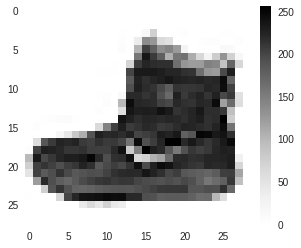

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
print(train_labels[0])

9


In [0]:
print(class_names[train_labels[0]])

Ankle boot


__Scale Images to a range between 0 and 1__

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Linear Regression

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5959 - accuracy: 0.7989
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4610 - accuracy: 0.8432
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4360 - accuracy: 0.8504
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4214 - accuracy: 0.8551
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4136 - accuracy: 0.8576
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4073 - accuracy: 0.8592
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4030 - accuracy: 0.8595
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3982 - accuracy: 0.8611
Epoch 9/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3934 - accuracy: 0.8631
Epoch 10/10
60000/60000 [============

### Evaluate the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.4564 - accuracy: 0.8397

Test accuracy: 0.8397


### Make predictions

In [0]:
predictions = model.predict(test_images)
print(predictions[0])

[4.46297577e-07 2.90906303e-08 9.65132040e-06 4.15495742e-06
 7.63542721e-06 1.20968714e-01 3.99439086e-05 9.47345272e-02
 1.46319168e-02 7.69602895e-01]


In [0]:
print(np.argmax(predictions[0]))

9


In [0]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


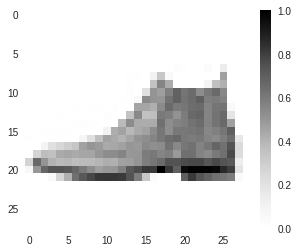

In [0]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
print(class_names[test_labels[0]])

Ankle boot
